In [61]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
eda_LR = pd.read_csv("/home/apprenant/PycharmProjects/pythonProject2/EDA/02-Row/eda_LR.csv")

 ### Lasso regression model

 #### Modelisation avec les paramètres par défaut

In [68]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def get_model_metrics(model, X, y, b1=True, b2=True):
    """
        Separate data in train and test sets,
        fit the model,
        make predictions on train and test datas,
        print metrics
        params:
            model(function): model used with params (ie: Lasso(alpha=x))
            X(DataFrame): DataFrame subset with selected features,
            y(Series): variable to predict
        returns:
                print β1, β0, R2 and RMSE
    """
    # Split des datas
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.8, random_state=1
    )
    model.fit(X_train, y_train)

    if b1:
        # Affichage des β1 pour chaque variable
        for idx, name in enumerate(X_train.columns):
            print(f"β1 de {name} : {round(model.coef_[idx], 3)}")
    if b2:
        print(f"β0 (intercept_) : {round(model.intercept_, 3)}\n")

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_list = [y_train, y_train_pred, y_test, y_test_pred]
    #get_r2_rmse(y_list)

In [66]:
get_model_metrics(Lasso(alpha=5),X,y)

β1 de Id : -1.908
β1 de MSSubClass : -134.472
β1 de LotArea : 0.466
β1 de OverallQual : 17591.405
β1 de OverallCond : 4909.509
β1 de YearBuilt : 354.728
β1 de YearRemodAdd : 140.739
β1 de BsmtFinSF1 : 15.555
β1 de BsmtFinSF2 : 2.825
β1 de BsmtUnfSF : 6.989
β1 de TotalBsmtSF : 4.137
β1 de 1stFlrSF : 35.604
β1 de 2ndFlrSF : 31.494
β1 de LowQualFinSF : 25.026
β1 de GrLivArea : 4.225
β1 de BsmtFullBath : 8557.482
β1 de BsmtHalfBath : 4352.124
β1 de FullBath : 5825.828
β1 de HalfBath : -321.993
β1 de BedroomAbvGr : -9970.989
β1 de KitchenAbvGr : -16900.197
β1 de TotRmsAbvGrd : 7453.045
β1 de Fireplaces : 3854.075
β1 de GarageCars : 11198.713
β1 de GarageArea : 3.379
β1 de WoodDeckSF : 37.203
β1 de OpenPorchSF : 5.865
β1 de EnclosedPorch : 28.754
β1 de 3SsnPorch : 9.875
β1 de ScreenPorch : 74.972
β1 de PoolArea : -144.455
β1 de MiscVal : -0.484
β1 de MoSold : -125.021
β1 de YrSold : -922.82
β0 (intercept_) : 806302.017



In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

def get_ml_metrics(model,X,y):
    '''
    separate data in train and test set
    fit the model
    predict target feature
    print metrics
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,  train_size = 0.8)
    model.fit(X_train, y_train)
    y_train_pred = model_lasso.predict(X_train)
    y_test_pred = model_lasso.predict(X_test)

In [5]:
'''Selecting features to train model'''
X=eda_LR.drop(['LotFrontage',
                'MasVnrArea',
                'GarageYrBlt',
               'SalePrice'],axis=1)
y=eda_LR['SalePrice']

'''We set the size of the train set to 75%. And the rest is for the test set.
We set the split NOT in random.'''

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,  train_size = 0.8)
'''# Here we train the model only on the train dataset.'''
model_lasso = Lasso().fit(X_train, y_train)

### prédiction pour le modèle Lasso:

In [ ]:
ytrainpred = model_lasso.predict(X_train)
ytestpred = model_lasso.predict(X_test)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}"
      .format(r2_score(y_train, ytrainpred), r2_score(y_test, ytestpred)))

eda_LR['p_SalePrice_lasso']=model_lasso.predict(eda_LR.drop(['LotFrontage',
                'MasVnrArea',
                'GarageYrBlt',
                'SalePrice'],axis=1))

 ### plotting SalePrice and Predicted SalePrice:

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=eda_LR['YearBuilt'],y =eda_LR['SalePrice'],label="lR predict values")
sns.scatterplot(x=eda_LR['YearBuilt'],y =eda_LR['p_SalePrice_lasso'],label="Lasso predict values",)

In [ ]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def get_best_alpha(model,X,y,alphas):
    print("Model : ", model,'\n')
    for i in alphas:
        model_search = model(alpha=i).fit(X,y)
        print("\nAlpha = " , i)
        print("\nScore for the Train dataset  :", model_search.score(X, y))
        print("Score for the Test dataset :", model_search.score(X,y))

In [ ]:
alpha=(1,5,10,15,25,50,75,100,150)

get_best_alpha(Lasso,X_train,y_train,alpha)
get_best_alpha(Ridge,X_train,y_train,alpha)

 ###


#

 ### Ridge regression model

 #### Modelisation avec les paramètrespar défaut


In [ ]:
from sklearn.preprocessing import StandardScaler


'''# Here we train the model only on the train dataset.'''
model_Ridge = Ridge().fit(X_train, y_train)
model_Ridge_alpha5 = Ridge(alpha=5).fit(X_train, y_train)
model_Ridge_alpha10 = Ridge(alpha=10).fit(X_train, y_train)
model_Ridge_alpha25 = Ridge(alpha=25).fit(X_train, y_train)
model_Ridge_alpha50 = Ridge(alpha=50).fit(X_train, y_train)

'''# And now we compare both scores :'''
print('for several criteria scores are : ')
print("\nScore for the Train dataset ", model_Ridge.score(X_train, y_train))
print("Score for the Test dataset :", model_Ridge.score(X_test, y_test))
print("\nAlpha = 5")
print("\nScore for the Train dataset  :", model_Ridge_alpha5.score(X_train, y_train))
print("Score for the Test dataset :", model_Ridge_alpha5.score(X_test, y_test))
print("\nAlpha = 10")
print("\nScore for the Train dataset  :", model_Ridge_alpha10.score(X_train, y_train))
print("Score for the Test dataset :", model_Ridge_alpha10.score(X_test, y_test))
print("\nAlpha = 25")
print("\nScore for the Train dataset  :", model_Ridge_alpha25.score(X_train, y_train))
print("Score for the Test dataset :", model_Ridge_alpha25.score(X_test, y_test))
print("\nAlpha =50")
print("\nScore for the Train dataset  :", model_Ridge_alpha50.score(X_train, y_train))
print("Score for the Test dataset :", model_Ridge_alpha50.score(X_test, y_test))

 ###    alpha over 10 doesn't give good results

In [12]:
ytrainpred = model_Ridge.predict(X_train)
ytestpred = model_Ridge.predict(X_test)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}"
      .format(r2_score(y_train, ytrainpred), r2_score(y_test, ytestpred)))

Pour les données d'entrainement le R2 vaut 0.8006715932967601 alors que pour les données de test, il est de 0.8113639469578335


### prediction for Ridge model with alpha = 5:

In [14]:
eda_LR['p_SalePrice_ridge']=model_Ridge_alpha5.predict(eda_LR.drop(['LotFrontage',
                'MasVnrArea',
                'GarageYrBlt',
                'p_SalePrice_lasso' ,
                'SalePrice'],axis=1))

 ### plotting SalePrice and Predicted SalePrice:

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

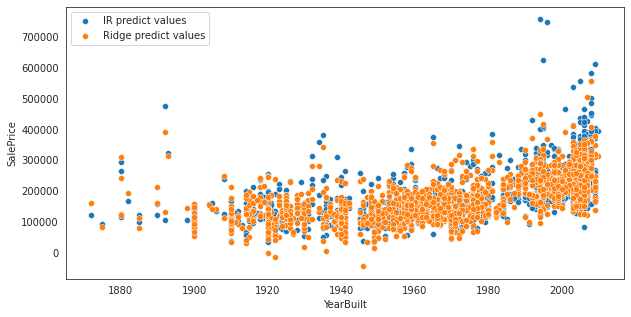

In [15]:
sns.set_style('white', {'legend.frameon':True})
plt.figure(figsize=(10, 5))
sns.scatterplot(x=eda_LR['YearBuilt'],y =eda_LR['SalePrice'],label="lR predict values")
sns.scatterplot(x=eda_LR['YearBuilt'],y =eda_LR['p_SalePrice_ridge'],label="Ridge predict values",)

 ### Gridsearch for Ridge:

In [16]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [17]:
'''Selecting features to train model'''
X=eda_LR.drop(['LotFrontage',
                'MasVnrArea',
                'GarageYrBlt',
               'SalePrice',
               'p_SalePrice_ridge',
               'p_SalePrice_lasso'],axis=1)
y=eda_LR['SalePrice']

In [80]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
def rsearch_CV(model,X,y,param_grid,n):
    from sklearn.model_selection import RandomizedSearchCV
    rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=n)
    rsearch.fit(X, y)
    # summarize the results of the random parameter search
    print ('=> RandomizedSearchCV  for ',model,'\n')
    print(rsearch.best_score_)
    print(rsearch.best_params_)
    print('Best Score: %s' % rsearch.best_estimator_.alpha)
    print('Best Hyperparameters: %s' % rsearch.best_params_)
    print('\n')
    return (rsearch.best_score_,rsearch.best_params_,rsearch.cv_results_)

In [81]:
'''
            paramètres possibles :
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1,5,10,15,25,50,75,100,150] # prepare a range of alpha values to test
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]'''

param_grid = {'alpha': [1,5,10,15,25,50,75,100,150],'normalize':[True,False]}
best_score_lasso,best_params_lasso,cv_result_lasso= rsearch_CV(Lasso(),X_train,y_train,param_grid,100)
best_score_ridge,best_params_ridge,cv_result_ridge= rsearch_CV(Ridge(),X_train,y_train,param_grid,100)

/home/apprenant/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/apprenant/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2471852527.1082764, tolerance: 564401606.449529
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2140312430.9836426, tolerance: 546077078.4629872
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 18 is s

=> RandomizedSearchCV  for  Lasso() 

0.7606983622233767
{'normalize': True, 'alpha': 50}
Best Score: 50
Best Hyperparameters: {'normalize': True, 'alpha': 50}


=> RandomizedSearchCV  for  Ridge() 

0.749957990558369
{'normalize': False, 'alpha': 25}
Best Score: 25
Best Hyperparameters: {'normalize': False, 'alpha': 25}




In [32]:
pd.DataFrame(cv_result_ridge)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalize,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017272,0.013273,0.008217,0.007743,True,1,"{'normalize': True, 'alpha': 1}",0.665645,0.792348,0.720769,0.748817,0.819854,0.749487,0.054117,7
1,0.019042,0.003135,0.007871,0.003828,False,1,"{'normalize': False, 'alpha': 1}",0.612804,0.769808,0.725908,0.783116,0.855944,0.749516,0.080144,6
2,0.013698,0.002562,0.003266,0.000935,True,5,"{'normalize': True, 'alpha': 5}",0.582752,0.644151,0.574873,0.578903,0.660743,0.608284,0.036523,11
3,0.015195,0.004199,0.003121,0.000672,False,5,"{'normalize': False, 'alpha': 5}",0.611901,0.770418,0.726176,0.783808,0.856275,0.749716,0.080614,4
4,0.011577,0.001828,0.003202,0.000914,True,10,"{'normalize': True, 'alpha': 10}",0.460826,0.496838,0.440992,0.438964,0.510387,0.469601,0.029119,12
5,0.022825,0.004632,0.003288,0.000291,False,10,"{'normalize': False, 'alpha': 10}",0.610887,0.770945,0.726373,0.784519,0.856576,0.749860,0.081116,3
6,0.016750,0.009396,0.002873,0.000311,True,15,"{'normalize': True, 'alpha': 15}",0.375323,0.400571,0.354719,0.351258,0.411552,0.378685,0.024071,13
7,0.004493,0.000552,0.002613,0.000120,False,15,"{'normalize': False, 'alpha': 15}",0.609975,0.771314,0.726470,0.785120,0.856790,0.749934,0.081550,2
8,0.006791,0.001876,0.002815,0.000294,True,25,"{'normalize': True, 'alpha': 25}",0.271138,0.286850,0.253542,0.249828,0.294248,0.271121,0.017576,14
9,0.004820,0.001201,0.002609,0.000140,False,25,"{'normalize': False, 'alpha': 25}",0.608374,0.771784,0.726476,0.786112,0.857045,0.749958,0.082278,1


In [ ]:
pd.DataFrame(cv_result_lasso)